# Session 2 - Data manipulation in numpy

Dans cette section, nous allons découvrir deux modules indispensables à la programmation scientifique: `numpy` et `matplotlib`. Ces 2 librairies sont les briques de bases sur lesquels de nombreux projets s'appuient. Elles suffisent normalement pour toute analyse de petits jeux de données.


* `numpy` est un module utilisé dans presque tous les projets de calcul numérique sous Python:
    * Il fournit des structures de données performantes pour la manipulation de vecteurs, matrices et tenseurs plus généraux. C'est l'objet de base pour manipuler de données tabulaires.
    * `numpy` est écrit en C et en Fortran d'où ses performances élevées lorsque les calculs sont vectorisés (formulés comme des opérations sur des vecteurs/matrices).


* `matplotlib` est un module performant pour la génération de graphiques en 2D et 3D:
   * syntaxe très proche de celle de Matlab,
   * supporte texte et étiquettes en $\LaTeX$,
   * sortie de qualité dans divers formats (PNG, PDF, SV, EPS...),
   * interface graphique interactive pour explorer les figures.


Pour utiliser `numpy` et `matplotlib` il faut commencer par les importer :

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Quelques rappels sur l'utilisation de `jupyter`

Quelques commandes de bases pour s'aider à trouver les informations:

- Dans le mode selection de cellule (*cellule bleue*): `h` montre les racourcis claviers.
- Dans le mode édition de cellule (*cellule verte*):
    - `np?` affiche l'aide du module `numpy`.
    - `np.` puis `tab` affiche les fonctions et les variable disponible dans le module `numpy`.
    - `np.array?` affiche la documentation de la fonction `array` du module `numpy`.
    - `%timeit` permet de mesurer la durée du temps pour executer la suite  de la ligne.


In [6]:
np.array?

# 1 -  Les tableaux `numpy`

Dans la terminologie `numpy`, vecteurs, matrices et autres tenseurs sont appelés `arrays`.
Pour créer un `array`, il existe plusieurs possibilités:

 * à partir de listes ou tuples.
 * en utilisant des fonctions dédiées, telles que `arange`, `linspace`, etc.
 * par chargement à partir de fichiers.

## 1.1 - Création et manipulation de tableaux


### 1.1.1 - A partir de listes

On peut créer un `array` en une dimension à partir d'une liste python classique, au moyen de la fonction `numpy.array` :

In [8]:
# un vecteur: l'argument de la fonction est une liste Python
v = np.array([1, 3, 2, 4])
print(v)
print(type(v))
v

[1 3 2 4]
<class 'numpy.ndarray'>


array([1, 3, 2, 4])

On peut utiliser la librairie `matplotlib` pour visualiser des tableaux 1D sous la forme de courbe:

2_numpy_data.csv	  numpy_broadcasting.png  random-matrix.txt
checkerboard.svg	  Numpy.ipynb		  solutions
K-nearest-centroid.ipynb  random-matrix.csv	  toto.png


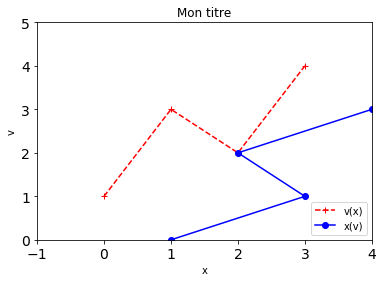

In [12]:
v = np.array([1, 3, 2, 4])
x = np.array([0, 1, 2, 3])

# Crée une nouvelle figure
plt.figure()

# Dessine la courbe v en fonction de x
# 'rv--' <=> color='red', marker='v', linestyle='dashed', 
# label -> utilisé pour la légende
plt.plot(x, v, color='red', marker='+',
         linestyle='dashed', label='v(x)')
plt.plot(v, x, color='blue', marker='o',
         linestyle='solid', label='x(v)')

# Rajoute une legende dans le coin en bas à droite
plt.legend(loc='lower right')

# Met une legende pour les axes
plt.xlabel('x')
plt.ylabel('v')

# Rajoute un titre
plt.title('Mon titre')

# Définie les limites des axes
plt.xlim([-1, 4])
plt.ylim([0, 5])

# Dans un script non-interactif, montre la figure et met en pause le script
# plt.show()

# Sauve la figure sous la forme d'un `png`
plt.savefig('toto.png')
! ls

La librairie `matplotlib` est très riche (et complexe). Il existe une [documentation fournie avec de nombreux d'exemples](https://matplotlib.org/). Le plus simple est souvent de chercher un exemple qui fait quelques choses de simlaire et regarder comment le faire.

#### Tableau multi-dimensionels

On peut aussi créer de tableau en plus grande dimension, comme des matrices ou des tenseurs, avec des listes imbriquées:

In [13]:
M = np.array([[1, 0], [3, 2]])
print(M)
print(type(M))

[[1 0]
 [3 2]]
<class 'numpy.ndarray'>


Les matrices peuvent être visualisées comme des images avec les fonctions `matshow` et `imshow` de `matplotlib`.

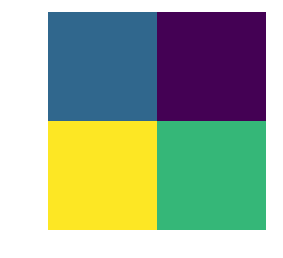

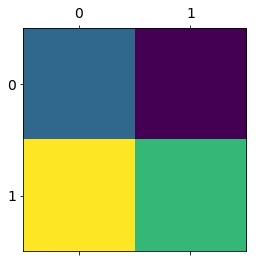

In [15]:
# On enlève les axes de la figure avec `plt.axis('off')`
plt.imshow(M)
plt.axis('off')

# Les axes sont modifiés directement par `matshow`
plt.matshow(M)

In [14]:
T = np.array([[[[1, 2], [3, 4]],
                [[5, 6], [7, 8]]],
              [[[9, 10], [11, 12]],
               [[13, 14], [15, 16]]]])
print(T)
print(type(T))

[[[[ 1  2]
   [ 3  4]]

  [[ 5  6]
   [ 7  8]]]


 [[[ 9 10]
   [11 12]]

  [[13 14]
   [15 16]]]]
<class 'numpy.ndarray'>


#### Attribut d'un `array`

L'object `array` dispose de plusieurs attributs qui renseignent des informations sur son contenu. On peut ainsi accéder à la taille total du vecteur et au type d'élément dans le vecteur à partir des attributs `size`, `nbytes` et `dtype`:

In [16]:
print("Taille du vecteur v: {}".format(v.size))
print("Type de donnée du vecteur v: {}".format(v.dtype))
print("Taille en bytes du vecteur v: {}".format(v.nbytes))

Taille du vecteur v: 4
Type de donnée du vecteur v: int64
Taille en bytes du vecteur v: 32


Les tableaux multi-dimensionels sont aussi de type `array`.  
Ils exposent donc les même attributs `size` et `dtype`:

In [17]:
print("M is a matrix with size={} and dtype={}"
      .format(M.size, M.dtype))
print("T is a tensor with size={} and dtype={}"
      .format(T.size, T.dtype))

M is a matrix with size=4 and dtype=int64
T is a tensor with size=16 and dtype=int64


**Exercice 1 :** (*Créé un tableau avec une liste*)  
* Créer un simple tableau à 2 dimensions (contenant les éléments que vous voulez).  
* Utiliser les fonctions `len()`, `np.shape()` sur votre tableau. Comment sont elles reliées? comment est ce relié à l'attribut `ndim`?

In [20]:
# %load solutions/exo01.py
# %%writefile solutions/exo01.py
A = np.array([[2, 3, 4, 5], [3, 5, 6, 6], [2, 4, 5, 9]])
print(A)

[[2 3 4 5]
 [3 5 6 6]
 [2 4 5 9]]


In [21]:
print(len(A))
print(np.shape(A))
print(A.shape)

print(A.ndim)
print(A.dtype)

# %load solutions/exo01.py

3
(3, 4)
(3, 4)
2
int64


Ce qui les distingues, ce sont le nombre de leur dimension `ndim` et leur forme `shape`:

In [22]:
print("v est un array de dimension {} avec une shape={}"
      .format(v.ndim, v.shape))
print("M est un array de dimension {} avec une shape={}"
      .format(M.ndim, M.shape))
print("T est un array de dimension {} avec une shape={}"
      .format(T.ndim, T.shape))

v est un array de dimension 1 avec une shape=(4,)
M est un array de dimension 2 avec une shape=(2, 2)
T est un array de dimension 4 avec une shape=(2, 2, 2, 2)


La `shape` d'un tableau peut être manipuler à grace à la fonction `reshape`.

In [23]:
v = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
print("v is shape:", v.shape)

v is shape: (12,)


In [24]:
M = v.reshape(3, 4)
print("M is shape {} while v is still shape {}"
      .format(M.shape, v.shape))

M is shape (3, 4) while v is still shape (12,)


In [25]:
M = v.reshape(3, -1)
print("M is shape:", M.shape)

M is shape: (3, 4)


In [26]:
T = v.reshape(1, 2, 3, 2, 1)
print("T is shape:", T.shape)

T is shape: (1, 2, 3, 2, 1)


In [27]:
# This will trow an error as we do keep all values in v
# when we reshape it.
v.reshape(3, 3)

ValueError: cannot reshape array of size 12 into shape (3,3)

#### Indexation des données

Comme pour les listes, on utilise les crochets pour accéder à un élément du tableau. L'indexation commence à `0` aussi. On peut aussi assigner des éléments directements:

In [28]:
print(v)
print(v[0], v[1])

[ 0  1  2  3  4  5  6  7  8  9 10 11]
0 1


In [29]:
v[2] = 42
print(v)

[ 0  1 42  3  4  5  6  7  8  9 10 11]


Pour les tableaux multi-dimensionnels, l'indexation renvoie aussi un `array` qui peut lui même être indexé. Une notation rapide avec des virgules est aussi possible:

In [30]:
print(M[0])

[ 0  1 42  3]


In [31]:
print("type(M[0]) = {}".format(type(M[0])))

type(M[0]) = <class 'numpy.ndarray'>


In [32]:
print("M[0][1] = {}".format(M[0][1]))

M[0][1] = 1


In [33]:
print(M[1])
print("M[1, 0] = {}".format(M[1, 0]))

[4 5 6 7]
M[1, 0] = 4


**Exercice 2 :** (*Indexation des donnés*)  
* Modifier le tableau `v` pour que son 3e élément soit égale à 0.
* Modifier le tableau `v` pour que son dernier élément soit égale à 10.

In [36]:
# %load solutions/exo02.py
# %%writefile solutions/exo02.py
v = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
print(v.shape)

(20,)


In [37]:
v[2] = 0
v[len(v) -1] = 10
v[-1] = 10
print(v)

# %load solutions/exo02.py

[ 1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 10]


#### Type de donnée

In [38]:
# Par default, le type des données est float64
v_float = np.array([1., 3.1, 2.5, 4., 0., 8.])
print(v_float)
print("Type de donnée du vecteur v_float: {}"
      .format(v_float.dtype))
print("Taille en bytes vecteur v_float: 6 x 8 = {}\n"
      .format(v_float.nbytes))

[1.  3.1 2.5 4.  0.  8. ]
Type de donnée du vecteur v_float: float64
Taille en bytes vecteur v_float: 6 x 8 = 48



À la création de l'`array`, on peut préciser de quelle type de donnée il s'agit avec l'argument `dtype`:
 * Types possibles avec `dtype` : `int`, `float`, `complex`, `bool`, `object`, etc.

On peut aussi créé des tableaux avec des types de données différents:

In [39]:
# On peut les convertir en entier -> perte de la partie décimale
v_int = np.array([1., 3.1, 2.5, 4., 0., 8.], dtype=int)
print(v_int)
print("Type de donnée du vecteur v_int: {}"
      .format(v_int.dtype))
print("Taille en bytes vecteur v_int: 6 x 8 = {}\n"
      .format(v_int.nbytes))

[1 3 2 4 0 8]
Type de donnée du vecteur v_int: int64
Taille en bytes vecteur v_int: 6 x 8 = 48



 * On peut aussi spécifier la précision en bits: `int64`, `int16`, `float128`, `complex128`.

In [40]:
# On peut les convertirs en float32 -> moins précis mais moins gros en mémoire
v_int32 = np.array([1., 3.1, 2.5, 4., 0., 8.], dtype=np.float32)
print(v_int32)
print("Type de donnée du vecteur v_int: {}"
      .format(v_int32.dtype))
print("Taille en bytes vecteur v_int: 6 x 4 = {}\n"
      .format(v_int32.nbytes))

[1.  3.1 2.5 4.  0.  8. ]
Type de donnée du vecteur v_int: float32
Taille en bytes vecteur v_int: 6 x 4 = 24



**Attention !** Une fois le type fixé, les données qui sont stockées dans le vecteur sont toutes du même type.

In [41]:
v = np.array([1, 2, 3, 4])
v[0] = 3.2
print(v)
print("dtype de v:", v.dtype)

[3 2 3 4]
dtype de v: int64


Le type des éléments doit rester le même lors de l'assignement. On ne peut donc pas assigner un élément qui ne peut pas être converti dans le `dtype` du tableau.

In [42]:
v[0] = "heloo"

ValueError: invalid literal for int() with base 10: 'heloo'

On peut cependant obtenir une copie l'`array` avec le bon type grace à la méthode `astype`:

In [44]:
v_float = v.astype(float)
v_float[0] = 3.2
print(v_float, "dtype =", v_float.dtype)

[3.2 2.  3.  4. ] dtype = float64


### 1.1.2 - A partir de fonctions spéciales


#### Tableaux constants
On peut créer des `array` à partir de fonctions spéciales:  
`np.zeros`, `np.ones`, `np.empty`, `np.eye`, ...

Toutes ces fonctions prennent comme premier argument `shape`.  

**Exercice 3 :** (*Générer des tableaux de constantes*)  
Utiliser les fonctions `np.zeros`, `np.ones` et `np.eye` pour répondre au question suivante:

In [47]:
# %load solutions/exo03.py
# %%writefile solutions/exo03.py
# Généré un tableau de 0 de taille 3, puis de taille (2, 3)
v0 = np.zeros((3,))
M0 = np.zeros((2, 3))
print("0 vector of size: {}\n".format(v0.shape), v0)
print("0 matrix of size: {}\n".format(M0.shape), M0)
assert v0.shape == (3,)
assert M0.shap`be == (2, 3)
assert np.all(M0 == 0)

0 vector of size: (3,)
 [0. 0. 0.]
0 matrix of size: (2, 3)
 [[0. 0. 0.]
 [0. 0. 0.]]


In [48]:
np.zeros?

In [49]:
# Généré un tableau de 1 de taille 10, puis de taille 2x3x2
v1 = np.ones(10)
M1 = np.ones((2, 3, 2))
print("1 vector of size: {}\n".format(v1.shape), v1)
print("1 tensor of size: {}\n".format(M1.shape), M1)
assert v1.shape == (10,)
assert M1.shape == (2, 3, 2)
assert np.all(M1 == 1)

1 vector of size: (10,)
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1 tensor of size: (2, 3, 2)
 [[[1. 1.]
  [1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]
  [1. 1.]]]


In [51]:
# Généré la matrice identité de taille 4x4
I = np.eye(4)
print("Id matrix of size: {}\n".format(I.shape), I)

Id matrix of size: (4, 4)
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


#### Générer des intervales

Les fonctions `arange` et `linspace` peuvent être utilisée pour générer des données séquentielles:

In [52]:
# create a range
x1 = np.arange(0, 21, 2) # arguments: start, stop, step
print("Valeurs paires de 0 à 20:", x1)

Valeurs paires de 0 à 20: [ 0  2  4  6  8 10 12 14 16 18 20]


In [53]:
# un tableau avec un pas non entier:
x2 = np.arange(-1, 1, 0.1)
print("Valeurs entre -1 et 1, tous les .1:", x2)

Valeurs entre -1 et 1, tous les .1: [-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


In [54]:
# un tableau avec un pas négatif:
x3 = np.arange(100, -1, -1)
print("Valeurs de 100 à 0", x3)

Valeurs de 100 à 0 [100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1   0]


**Exercice 4 :** (Générer de interval*)  
Recréer les mêmes tableaux avec la fonction `np.linspace`

In [59]:
# %load solutions/exo04.py
# %%writefile solutions/exo04.py
# avec linspace, le début et la fin SONT inclus
# np.linspace?

# Créer un tableau avec les valeurs paires de 0 à 20:
l1 = np.linspace(0, 20, 11)
assert np.allclose(l1, x1)
print(l1)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


In [61]:
# Créer un tableau avec les valeurs entre -1 et 1, tous les .1:
l2 = np.linspace(-1, .9, 20)
assert np.allclose(l2, x2)
print(l2)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -1.11022302e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


In [62]:
# Créer un tableau avec les valeurs de 100 à 0:
l3 = np.linspace(100, 0, 101)
assert np.allclose(l3, x3)
print(l3)

[100.  99.  98.  97.  96.  95.  94.  93.  92.  91.  90.  89.  88.  87.
  86.  85.  84.  83.  82.  81.  80.  79.  78.  77.  76.  75.  74.  73.
  72.  71.  70.  69.  68.  67.  66.  65.  64.  63.  62.  61.  60.  59.
  58.  57.  56.  55.  54.  53.  52.  51.  50.  49.  48.  47.  46.  45.
  44.  43.  42.  41.  40.  39.  38.  37.  36.  35.  34.  33.  32.  31.
  30.  29.  28.  27.  26.  25.  24.  23.  22.  21.  20.  19.  18.  17.
  16.  15.  14.  13.  12.  11.  10.   9.   8.   7.   6.   5.   4.   3.
   2.   1.   0.]


#### Générer des tableaux aléatoires

Pour généré des tableaux plus complex, on peut utiliser le module `np.random` de `numpy`.  
Ce module implémente principalement 2 générateurs de nombre aléatoire:

* **Uniforme:** `np.random.rand` génère des nombres tirés uniformément dans $[0, 1]$.
* **Normale:** `np.random.randn` génère des nombres tirés selon une loi normale $\mathcal N(0, 1)$.

Il expose aussi des fonctions de plus haut niveau pour différentes lois de probabilité.

In [63]:
np.random.rand(5, 5)

array([[0.13701695, 0.50050068, 0.72372287, 0.38720657, 0.99288529],
       [0.76671577, 0.17277935, 0.60222122, 0.57812021, 0.61946575],
       [0.54201014, 0.70271561, 0.0920047 , 0.93072466, 0.92752082],
       [0.74611367, 0.26469678, 0.37643759, 0.69450657, 0.10900058],
       [0.49187455, 0.27212687, 0.67720455, 0.5602595 , 0.79269807]])

In [64]:
np.random.randn(5, 5)

array([[-1.0350346 , -0.71722036, -2.24467818,  2.19458162, -0.6444436 ],
       [-1.01211518, -0.63523486,  1.35571377, -0.25644713,  1.65398508],
       [-2.44127447,  1.00717743,  0.76478865,  1.31799452,  1.95938996],
       [ 0.78880277, -1.39661771,  1.06876903, -0.3664024 , -0.67287755],
       [-2.36746591, -1.01500642,  0.32410319, -0.56470447, -0.1907011 ]])

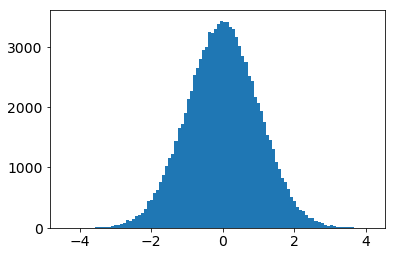

In [69]:
a = np.random.randn(100000)
hh = plt.hist(a, bins=100)

### 1.1.3 - A partir d'un fichier: I/O pour les `array`

#### Fichiers séparés par des virgules (CSV)

Un format fichier classique est le format CSV (comma-separated values), ou bien TSV (tab-separated values). Pour lire de tels fichiers, on peut utiliser `numpy.genfromtxt`. Par exemple:

In [70]:
!cat 2_numpy_data.csv

1, 2, 3, 4
5, 6, 7, 8
9, 10, 11, 12


In [71]:
data = np.genfromtxt('2_numpy_data.csv', delimiter=',')
data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.]])

A l'aide de `numpy.savetxt` on peut enregistrer un *array* `numpy` dans un fichier txt:

In [72]:
M = np.random.rand(3,3)
print(M)

[[0.04365938 0.0669154  0.630113  ]
 [0.51922962 0.93672732 0.59567832]
 [0.17486574 0.65084498 0.36458051]]


In [74]:
np.savetxt("random-matrix.txt", M, delimiter=';')
!cat random-matrix.txt

4.365937988560653071e-02;6.691539528873335918e-02;6.301130025822803127e-01
5.192296176620916359e-01;9.367273232421957641e-01;5.956783249657002788e-01
1.748657432852392946e-01;6.508449845583604843e-01;3.645805147306898641e-01


In [75]:
np.savetxt("random-matrix.csv", M, fmt='%.5f', delimiter=';') # fmt spécifie le format

!cat random-matrix.csv

0.04366;0.06692;0.63011
0.51923;0.93673;0.59568
0.17487;0.65084;0.36458


### 1.1.4 - Indexing des tableaux

Comme les listes, les tableaux élément des tableaux peuvent être séléctioné avec du slicing.
*Slicing* fait référence à la syntaxe `M[start:stop:step]` pour extraire une partie d'un *array*:

In [76]:
v = np.arange(5)
v = np.arange(0, 5, 1)
print(v)

[0 1 2 3 4]


In [78]:
print("Indices de début, fin, et pas avec leurs valeurs"
      " par défaut:\n", v[::])

Indices de début, fin, et pas avec leurs valeurs par défaut:
 [0 1 2 3 4]


In [79]:
print("Pas de 2:", v[::2])

Pas de 2: [0 2 4]


In [80]:
print("Les 3 premiers éléments:", v[:3])
print("A partir de l'indice 2:", v[2:])

Les 3 premiers éléments: [0 1 2]
A partir de l'indice 2: [2 3 4]


De la même manière, chaque dimension du tableau peut être *slicée*:

In [81]:
M = np.arange(12).reshape(4, 3)
print(M)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [82]:
print("On selectionne une ligne sur 2 et pas la"
      " 1ere colone:\n", M[::2, 1:])

On selectionne une ligne sur 2 et pas la 1ere colone:
 [[1 2]
 [7 8]]


In [83]:
print("On selectionne les lignes 1 et 2 et uniquement la dernière colone:\n",
      M[1:3, :1])

On selectionne les lignes 1 et 2 et uniquement la dernière colone:
 [[3]
 [6]]


Les slices (ou tranches) sont modifiables :

In [84]:
M[1::2, -1:1:-1] = 1000
print(M)

[[   0    1    2]
 [   3    4 1000]
 [   6    7    8]
 [   9   10 1000]]


**Exercice 5 :** (*le plateau d'échec*)

Créez un tableau de zéros et le remplir pour obtenir un motif de plateau d'échec de dimension 8x8.
<img src="checkerboard.svg" width=300, height=300>

In [ ]:
# %load solutions/exo05.py
# %%writefile solutions/exo05.py
E = np.zeros((8, 8))
E[0::2, 0::2] = 1
E[1::2, 1::2] = 1
plt.matshow(E, cmap='gray')

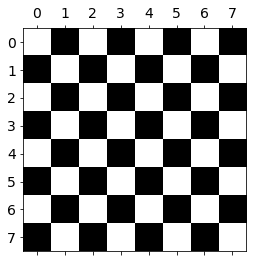

In [91]:
E = np.tile([[1, 0], [0, 1]], (4, 4))
E

np.tile?

# %load solutions/exo05.py

#### Indexation avancée (*fancy indexing*)

Lorsque qu'on utilise des listes ou des *array* pour définir des tranches : 

In [92]:
A = np.array([[n + m * 10 for n in range(5)]
               for m in range(5)])
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [93]:
row_indices = [1, 2, 3]
print(A[row_indices])

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [99]:
print(A[[1, 2]][:, [3, 0]])

[[13 10]
 [23 20]]


In [100]:
A[[1, 2]][:, [3, 4]] = 0  # ATTENTION !
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [101]:
A[np.ix_([1, 2], [3, 4])] = 0
print(A)

[[ 0  1  2  3  4]
 [10 11 12  0  0]
 [20 21 22  0  0]
 [30 31 32 33 34]
 [40 41 42 43 44]]


On peut aussi utiliser des masques binaires :


In [106]:
B = np.random.rand(100)
B

array([3.70997966e-01, 4.47595312e-02, 2.05973723e-01, 6.76527149e-02,
       8.74986929e-01, 9.15313852e-01, 3.23872814e-01, 2.35037297e-01,
       6.94226839e-01, 4.21408811e-01, 9.30523273e-01, 7.14691348e-01,
       8.23792937e-01, 7.16463478e-01, 4.06203817e-01, 4.00887507e-02,
       6.05557111e-01, 5.76398523e-01, 7.89843427e-02, 7.98335399e-03,
       8.43822014e-02, 8.13138978e-01, 4.91608879e-01, 8.45618156e-01,
       8.63522311e-01, 9.40732900e-01, 4.12026203e-01, 4.88020988e-01,
       2.29348474e-01, 7.07640720e-01, 3.81802517e-01, 9.28202877e-01,
       7.29118982e-01, 6.36900370e-01, 4.27057257e-01, 3.29367976e-01,
       1.05780875e-01, 5.75694814e-01, 9.13497327e-01, 1.38574066e-01,
       3.26334863e-01, 7.37973906e-01, 1.31081632e-01, 2.99200196e-01,
       4.86990188e-01, 5.76970086e-01, 8.27099425e-01, 7.05371347e-01,
       5.16676058e-01, 7.11919637e-01, 1.93623077e-01, 6.89056796e-01,
       1.03077450e-01, 1.61344087e-01, 1.82523234e-01, 6.88806596e-01,
      

In [108]:
B > .9

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [111]:
print(B[B < .1])

[0.04475953 0.06765271 0.04008875 0.07898434 0.00798335 0.0843822
 0.04888937 0.04142705 0.09893799 0.00063912]


In [112]:
# ou encore
B = np.arange(5)
a = np.array([1, 2, 3, 4, 5])
print(a < 3)
print(B[a < 3])

[ True  True False False False]
[0 1]


**Exercice 6 :** (*Fancy indexing*)  
* Généré un tableau contenant  contenant 100 éléments tirés au hasard selon $\mathcal U([0, 1])$ (~ `np.random.rand`).
* En utilisant l'indexation avancée, sélectionnez au hasard avec répétition 10 éléments de ce tableau.

(*Astuce: `np.random.randint(max_int, size=n)` génère n nombres au hasard de 0 à `max_int`*)

In [115]:
# %load solutions/exo06.py
# %%writefile solutions/exo06.py
X = np.random.rand(100)
X

array([0.0798363 , 0.52455502, 0.21922249, 0.1341591 , 0.0708364 ,
       0.84893481, 0.55448275, 0.47302285, 0.51781387, 0.14433243,
       0.1515431 , 0.21736878, 0.96297208, 0.34671426, 0.52672145,
       0.82328046, 0.95846791, 0.43374519, 0.23083201, 0.33388264,
       0.22595876, 0.98308155, 0.13395051, 0.99195712, 0.59211926,
       0.56587034, 0.708684  , 0.22615544, 0.31828448, 0.70632156,
       0.09060548, 0.48973948, 0.62559019, 0.89558921, 0.73706711,
       0.674786  , 0.65456345, 0.79359108, 0.35302571, 0.29948921,
       0.65033085, 0.97393869, 0.16466555, 0.59395914, 0.37002315,
       0.22685285, 0.0247765 , 0.16176339, 0.74470735, 0.37766872,
       0.91150496, 0.54232997, 0.77266471, 0.09828672, 0.28102543,
       0.1470411 , 0.58786357, 0.97534115, 0.90054626, 0.38541122,
       0.05030253, 0.77112584, 0.43141354, 0.11212776, 0.95974073,
       0.68366898, 0.00655925, 0.79118113, 0.20455882, 0.13629966,
       0.43091677, 0.3339092 , 0.8878336 , 0.49514478, 0.42399

In [116]:
idx = np.random.randint(100, size=10)
print(idx)

[85 66  2  2 47 21 50 75 27  4]


In [119]:

print(X[idx])
X[85]

# %load solutions/exo06.py

[0.97968681 0.00655925 0.21922249 0.21922249 0.16176339 0.98308155
 0.91150496 0.63078818 0.22615544 0.0708364 ]


0.9796868143534339

In [121]:
np.random.choice(X, size=10, replace=False)

array([0.62559019, 0.33388264, 0.49422096, 0.23083201, 0.82328046,
       0.81431221, 0.05030253, 0.43374519, 0.59395914, 0.38541122])

#### where

Un masque binaire peut être converti en indices de positions avec `where`

In [ ]:
x = np.arange(0, 10, 0.5)
print(x)
mask = (x > 5) * (x < 7.5)
print(mask)
indices = np.where(mask)
indices

In [ ]:
x[indices] # équivalent à x[mask]

## 1.2 - Opérations sur les tableaux

Maintenant que l'on a vu comment créér des tableaux et accéder à leur élément, on va voir les opérations mathématique que l'on peut faire dessus:

### 1.2.1 - Opérations scalaires et terme-à-terme

On peut effectuer les opérations arithmétiques habituelles pour multiplier, additionner, soustraire et diviser des arrays avec/par des scalaires :

In [124]:
v1 = np.ones(10)
print(v1)
print(v1 * 2)
print(v1 + 10)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[11. 11. 11. 11. 11. 11. 11. 11. 11. 11.]


On peut aussi appliqué des fonctions mathématiques terme-à-terme comme `np.exp`, `np.log`, `np.sqrt`, `np.abs`, `np.sin`, `np.cos`, `np.arctan`, ...

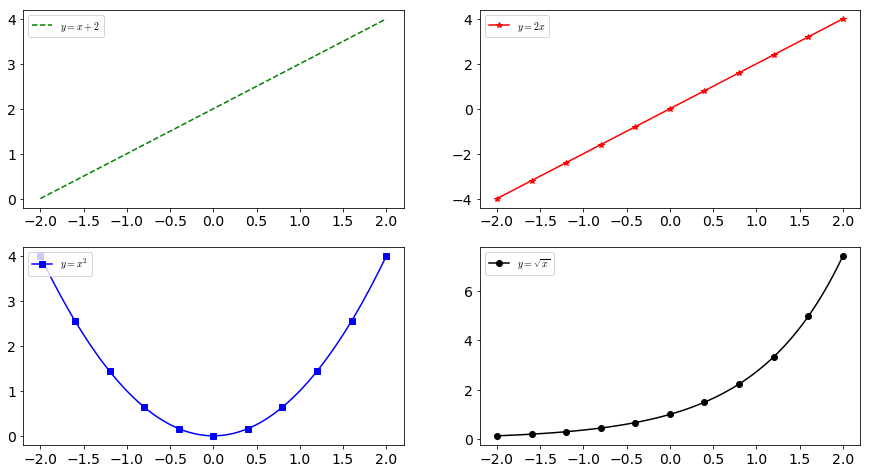

In [125]:
x = np.linspace(-2, 2, 101)

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(x, x + 2,'g--', label='$y = x + 2$')
plt.legend(loc=0)

plt.subplot(2, 2, 2)
plt.plot(x, 2 * x, 'r*-', label='$y = 2x$', markevery=10)
plt.legend(loc=2)

plt.subplot(2, 2, 3)
plt.plot(x, x ** 2, 'bs-', label='$y = x^2$', markevery=10)
plt.legend(loc=2)

plt.subplot(2, 2, 4)
plt.plot(x, np.exp(x), 'ko-', label='$y = \sqrt{x}$', markevery=10)
plt.legend(loc=2)
plt.show()

**Exercice 7 :** (*Courbe paramétrique*)  
Tracer la courbe $x = cos(t)$ et $y=sin(t)$ pour $t \in [0, 2\pi]$.  
On pourra utiliser la constante $\pi =$`np.pi`.

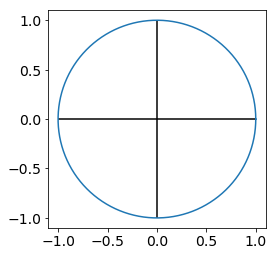

In [127]:
# %load solutions/exo07.py
# %%writefile solutions/exo07.py
t = np.linspace(0, 2 * np.pi, 1000)

x = np.cos(t)
y = np.sin(t)

ax = plt.subplot(aspect='equal')
ax.plot(x, y)
ax.vlines(0, -1, 1)
ax.hlines(0, -1, 1)

# %load solutions/exo07.py


Les opérations par défaut entre 2 `array` sont aussi terme-à-terme.

In [128]:
A = np.arange(25).reshape(5, 5)
print(A)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [129]:
print(A * A)

[[  0   1   4   9  16]
 [ 25  36  49  64  81]
 [100 121 144 169 196]
 [225 256 289 324 361]
 [400 441 484 529 576]]


In [130]:
print((A + A.T)/ 2)

[[ 0.  3.  6.  9. 12.]
 [ 3.  6.  9. 12. 15.]
 [ 6.  9. 12. 15. 18.]
 [ 9. 12. 15. 18. 21.]
 [12. 15. 18. 21. 24.]]


In [133]:
A = np.zeros((2, 3))
B = np.zeros((4, 3))
print(A, B)
A+B

[[0. 0. 0.]
 [0. 0. 0.]] [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


ValueError: operands could not be broadcast together with shapes (2,3) (4,3) 

En multipliant des *arrays* de tailles compatibles, on obtient des multiplications terme-à-terme par ligne :

In [134]:
v1 = np.arange(6)
A = np.ones((5, 6))
print(A.shape, v1.shape)
print(A)
print(v1)
print(A * v1)

(5, 6) (6,)
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
[0 1 2 3 4 5]
[[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]]


De façon plus générale, on peut faire des opérations sur des tableaux de différentes tailles. Dans certains cas, NumPy peut transformer les tableaux pour qu'ils aient la même taille, cette conversion s'appelle le **"Broadcasting"**.
<img src="numpy_broadcasting.png" width=600>

In [135]:
a = np.arange(4)
b = np.arange(5)
print(a, a.shape)
print(b, b.shape)
a * b

[0 1 2 3] (4,)
[0 1 2 3 4] (5,)


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [137]:
B = b[np.newaxis, :]
A = a[:, None]
c = A * B
print(c)
print(A.shape, B.shape, c.shape)

[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]]
(4, 1) (1, 5) (4, 5)


Il existe une règle pour savoir dans quel cas on peut faire du "broadcasting":
**Dans une opération, la taille des axex des deux tableaux doit être soit la même, soit une des deux doit être 1**.
Dans la figure ci-dessus, cette règle est respectée:
```
a:      4 x 3   
b:      4 x 3
result: 4 x 3

a:      4 x 3
b:          3
result: 4 x 3

a:      4 x 1
b:          3
result: 4 x 3
```

Que donnerait les deux cas suivant?

```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 

A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  
```

**Exercice 8 :** (*Opération terme-à-terme*)

Sans utiliser de boucles (`for/while`) :

 * Créer une matrice (5x6) aléatoire
 * Remplacer une colonne sur deux par sa valeur moins le double de la colonne suivante
 * Remplacer les valeurs négatives par 0 en utilisant un masque binaire


In [ ]:
%load solutions/exo08.py

### 1.2.2 - Algèbre matricielle

Comment faire des multiplications de matrices ? Deux façons :
 
 * en utilisant les fonctions `dot`; (recommandé)
 * en utiliser l'opérateur `@`.

In [ ]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
v1 = np.arange(5)
print(A.shape, v1.shape)
print(A)
print(v1)
print(type(A), type(v1))

In [ ]:
print(v1 * v1)  # multiplication élément par élément
print(np.dot(v1, v1))  # multiplication matrice
print(v1 @ v1)  # multiplication matrice

In [ ]:
A.dot(v1)

In [ ]:
print(A * A)  # multiplication élément par élément
print(A @ A)  # multiplication matrice

Voir également les fonctions : `inner`, `outer`, `cross`, `kron`, `tensordot`. Utiliser par exemple `help(kron)` ou `kron?`.

### 1.2.3 - Algébre de plus haut niveau

`numpy` expose aussi des fonctionalités de plus haut niveau telles que les décompositions classique en valeurs propres/singulières, factorisation de Cholesky/QP, ...  
Ces fonctionalités sont regroupées dans le module `np.linalg`.  
Beaucoup d'outils du calcul scientifique en python, compatible avec `numpy` sont aussi accessibles dans la librairie [`scipy`](https://docs.scipy.org/doc/). Pour plus, d'information, voir [tutorial scipy](http://scipy-lectures.org/).

**Exercice 9 :** (*Résolution d'un système linéaire*)  
Résoudre le systeme d'équation: $\begin{cases}3x -2y +z &= 10\\x +5y + 10z &= 21\\y - z &= -5\\\end{cases}$.  
(*Astuce:* utiliser la fonction `np.linalg.inv`).

In [16]:
%load solutions/exo09.py

Overwriting solutions/exo09.py


### 1.2.4 - Opérations de réduction

Enfin, `numpy` propose de opération de réduction sur les tableaux.  
Ces opérations calculent une quantité selon un axe en aggrégeant l'information comme par exemple: `np.max`, `np.min`, `np.sum`, `np.mean`, `np.std`, `np.argmax`, ...

In [24]:
data = np.arange(20)
print(data.sum())
print("Moyenne:", np.mean(data), "Std:", data.std(), "Var:", data.var())

190
Moyenne: 9.5 Std: 5.766281297335398 Var: 33.25


Par défault, la quantité est évaluer pour le tableau en entier.  
Mais pour les tableau multi-dimensionels, il est aussi possible de spécifier la direction de l'opération:

In [27]:
data = np.arange(20).reshape((5, 4))
data[3, :] = 9
print(data)

# Moyenne globale:
print("Moyenne globale:", data.mean())
print("Moyennes par colone:", data.mean(axis=1))
print("Moyennes par ligne:", data.mean(axis=0))

# la moyenne de la troisième colonne
print("Moyenne de la 3e ligne", np.mean(data[3, :]), data.mean(axis=0)[3])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 9  9  9  9]
 [16 17 18 19]]
Moyenne globale: 8.6
Moyennes par colone: [ 1.5  5.5  9.5  9.  17.5]
Moyennes par ligne: [7.4 8.2 9.  9.8]
Moyenne de la 3e ligne 9.0 9.8


**Exercice 10 :** (*Blanchiment de donnée*)  
Créer un tableau X de taille `100x5` selon une loi normale.  
Soustrayer à chaque colone sa moyenne et ladiviser par son écart type.

In [30]:
%load solutions/exo10.py

Overwriting solutions/exo10.py


### 1.2.5 - Concaténer, répéter des `arrays`

En utilisant les fonctions `repeat`, `tile`, `vstack`, `hstack`, et `concatenate`, on peut créer des vecteurs/matrices plus grandes à partir de vecteurs/matrices plus petites :

In [34]:
# Repeat et tile:
a = np.array([[1, 2], [3, 4]])
print(a)
# répéter chaque élément 3 fois
print(np.repeat(a, 3)) # résultat 1-d

# on peut spécifier l'argument axis
print(np.repeat(a, 3, axis=1))

# répéter la matrice 3 fois
print(np.tile(a, 3))

[[1 2]
 [3 4]]
[1 1 1 2 2 2 3 3 3 4 4 4]
[[1 1 1 2 2 2]
 [3 3 3 4 4 4]]
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]]


In [43]:
# Concatenate
b = np.array([[5, 6]])
print("Add a line\n", np.concatenate((a, b), axis=0))
print("Vertical\n", np.vstack((a, b)))

# stacking horizontal ou vertical
print("Add a column\n", np.concatenate((a, b.T), axis=1))
print("Horizontal\n", np.hstack((a, b.T)))

Add a line
 [[1 2]
 [3 4]
 [5 6]]
Vertical
 [[1 2]
 [3 4]
 [5 6]]
Add a column
 [[1 2 5]
 [3 4 6]]
Horizontal
 [[1 2 5]
 [3 4 6]]


### 1.2.6 - Itérer sur les éléments d'un array

 * Dans la mesure du possible, il faut éviter l'itération sur les éléments d'un *array* : c'est beaucoup plus lent que les opérations vectorisées
 * Mais il arrive que l'on n'ait pas le choix...
 
 * Pour obtenir les indices des éléments sur lesquels on itère (par exemple, pour pouvoir les modifier en même temps) on peut utiliser `enumerate` :

In [49]:
M = np.array([[1, 2], [3, 4]])

for row in M:
    print("row", row)
    
    for i, element in enumerate(row):
        print(f"Element {i} ->", element)

row [1 2]
Element 0 -> 1
Element 1 -> 2
row [3 4]
Element 0 -> 3
Element 1 -> 4


### 1.2.7 - Utilisation d'`arrays` dans des conditions

Losqu'on s'intéresse à des conditions sur tout on une partie d'un `array`, on peut utiliser `any` ou `all` :

In [50]:
print(M)

if (M > 5).any():
    print("au moins un élément de M est plus grand que 5")
else:
    print("aucun élément de M n'est plus grand que 5")


if (M > 5).all():
    print("tous les éléments de M sont plus grands que 5")
else:
    print("tous les éléments de M sont plus petits que 5")

[[1 2]
 [3 4]]
aucun élément de M n'est plus grand que 5
tous les éléments de M sont plus petits que 5


# 2 - Plus proche moyenne

Nous allons maintenant implémenter l'agorithme des [plus proches centroids](https://en.wikipedia.org/wiki/Nearest_centroid_classifier) en pure `numpy`, depuis la génération de donnée jusqu'a la visualisation du résultat.  
L'idée de cette algorithme est simple:
* A partir de l'ensemble d'entrainement $(X^i, y^i)$, calculer pour chaque classe la moyenne des points de cette classe, *i.e.* $\bar X_l = \frac{1}{|C_l|} \sum_{i\in C_l} X^i$ où $C_l$ est les indices des points appartenant à la classe $l$.
* Pour un point de test $X$, lui assigner la classe $y = \arg\min_l \|X - \bar X_l\|_2$.

Les étapes à réaliser sont:

1) Générer des nuages de points en 2D selon des lois normales de moyennes différentes pour chaque classe.

2) Visualiser ces nuages de points

3) Diviser les données entre un ensemble d'entrainement et un ensemble de test.

4) Entrainer le modèle: calculer les centroids pour chacune des classes

5) Utiliser le modèle: prédire les classes des points dans l'ensemble de test.

6) Évaluer le modèle: donner la précision et le rappel du modèle.


### 2.1 - Génération des données

On va maintenant utiliser les fonctions que l'on a vu précédement pour générer des données pour notre algorithme de plus proche centroid.  
* On va créer des données avec 2 classes : $\{0, 1\}$.
* Pour la classe $i$, on générera les X associés dans $\mathbb R^2$ selon la loi normale $\mathcal N(\mu_i, \pmb I_2)$.


Procédez selon les étapes suivantes:
* Créer 2 vecteurs avec en dimension 2 correspondant aux moyennes de chacune des classes. On commencera avec de moyenne deterministe $\mu_0 = 0$ et $\mu_1 = [rho, rho]$ avec $rho=3$.
* Concaténer `mu0` et `mu1` en un vecteur `mu` de taille `n_classes` x `n_dims` (Indice: utiliser `np.concatenate`).
* Générer un vecteur de classes `y` de taille `n_points=1000` avec des valeurs uniforme dans $\{0, 1\}$.
* Générer un jeu de donné $X$ avec `n_points=1000` points en dimension `n_dim=2` selon la loi $\mathcal N(0, \pmb I_2)$. (*Rappel:* tiré selon une loi normal de covariance $\pmb I_2$ revient à tirer chaque coordonnée selon une loi normale indépendante.)
* Ajouter à chaque point la moyenne correspondant à sa classe
* Faire une fonction qui prend en entrée `n_points` et `mu` et qui retourne un jeu de donnée `X, y`.

In [ ]:
n_dim = 2
n_points = 1000

In [ ]:
%load solutions/exo21.py

In [ ]:
%load solutions/exo22.py

In [ ]:
%load solutions/exo23.py

### 2.2 - Visualisation des données

Utiliser la fonction `plot_data` pour visualiser les données.  
* Afficher les donnés $(X, y)$, avec l'option `alpha=.1`.
* Afficher les moyennes avec les mêmes couleurs et l'option `s=256, alpha=1`.
Que fait la fonction scatter?

Bonus:

* Visualiser la fonction de répartition des données à l'aide de `plt.contourf`.

In [ ]:
plt.scatter?

In [ ]:
MARKERS = ['^', 's', 'o', 'h', '>', 'v', '*', '+', 'x', '<']
CMAP = plt.get_cmap('tab10', 10)

def plot_data(X, y, alpha=1, s=36):
    """Plot the data with color depending on the classes.
    
    Parameter
    =========
    X: ndarray, shape (n_points, n_dim)
        Point to display
    y : ndarray, shape (n_points,)
        Classes for each point
    alpha: float
        Opacity of the points
    s: int
        Size of the points in pt^2.
    """
    for i in np.unique(y):
        plt.scatter(X[y == i, 0], X[y == i, 1], s=s,
                    c=CMAP(i % 10), alpha=alpha,
                    marker=MARKERS[i % 10])

In [ ]:
%load solutions/exo24.py

In [ ]:
%load solutions/exo25.py

### 2.3 - Séparation en ensemble d'entrainement et de test

1) Pour les techniques d'apprentissage supervisé, il est necessaire d'utiliser un ensemble pour apprendre le modèle `X_train, y_train` et un ensemble pour l'évaluer `X_test, y_test`. Créer ces 2 ensembles tirant aléatoirement 60% des donnés pour le train et le reste pour le test. On pourra utiliser soit:
* Un mask booleen `mask_train` tiré aléatoirement à partir d'une loi uniforme comparée à `0.5`.
* La fonction `np.choice` pour créer un ensemble `id_train`

2) Écrire une fonction qui prenne en entrée `(X, y)` et retourne 2 ensemble de données `(X_train, y_train)` et `(X_test, y_test)`. On pourra ajouter un paramètre `ratio` (float in [0, 1]) qui donne le rapport de proportion train/test.

In [ ]:
%load solutions/exo26.py

In [ ]:
%load solutions/exo27.py

### 2.4 - Entrainement de la plus proche moyenne

Calculer les moyennes par classes:
* On créera d'abord un tableau vide de taille `n_classes` x `n_dim`.
* Calculer les moyennes empirique $\bar \mu_i = \sum_{j \in C_i} X_j$ de `X_train` pour chaque classe $C_i$ .
* Afficher les resultats avec la fonction `plot_data`.

In [ ]:
%load solutions/exo28.py

 ### 2.5 - Prédictions

Générer les prédicitons à partir de ce modèle pour l'ensemble `X_test`:
* Pour chaque classe, calculer la distance de la moyenne empirique $\bar \mu_i$ à tous les points et la stockée dans une matrice `C` de taille `n_points` x `n_classes`.
* Pour chaque point, prédite $\bar y = \arg\min_i \| X - \bar \mu_i\|_2^2$
* Afficher les resultats avec la fonction `plot_data`.

In [ ]:
%load solutions/exo29.py

#### Benchmarking a function

In [ ]:
%timeit C = [((X_test - mu_i[None])**2).sum(axis=1) for mu_i in mu]
%timeit C = ((X_test[:, None] - mu[None]) ** 2).sum(axis=-1)
from scipy.spatial.distance import cdist
%timeit C = cdist(X_test, mu)
%timeit C = cdist(X_test, mu, 'sqeuclidean')
    

### 2.6 - Évaluation du model

Maintenant que l'on a fait des prédictions, on va calculer l'accuracy du modèle. Évaluer les prédictions du modèle entrainé précédement avec la formule: $P(\bar y) = \frac{1}{N}\sum_{i} 1\{\bar y_i = y_i\}$.

In [ ]:
%load solutions/exo30.py

### 2.7 - Fonctions

On va maintenant regrouper tout ce qu'on a fait auparavent dans des fonctions.

1) Faire une fonction `generate_data` qui prend en entrée `n_points` et `mu` et qui retourne un jeu de donnée `X, y` comme généré dans 2.1. On rappelle que:
* `mu` est de taille `n_classes` x `n_dim`.
* Pour chaque point, `y` est tiré aléatoirement entre `n_classes`.
* `X` est généré selon une loi normale de moyenne `mu[y]` et de variance $\pmb I$.


2) Écrire une fonction `split_train_test` qui prenne en entrée `(X, y)` et retourne 2 ensemble de données `(X_train, y_train)` et `(X_test, y_test)`. On pourra ajouter un paramètre `ratio` (float in [0, 1]) qui donne le rapport de proportion train/test.

3) Écrire une fonction `fit` qui prenne en entrée `X_train, y_train` et qui renvoie les centroids de chacune des classes `centroids`.

4) Écrire une fonction `predict` qui prenne en entrée `X_test` et `centroids` et qui renvoie en sortie la prédiction `y_pred` du modèle.

5) Faire une fonction `score` qui prend en entrée un couple `y` et `y_pred` et qui retourne l'accuracy pour ce couple.

In [ ]:
%load solutions/func_generate_data.py

In [ ]:
%load solutions/func_split_train_test.py

In [ ]:
%load solutions/func_fit.py

In [ ]:
%load solutions/func_predict.py

In [ ]:
%load solutions/func_score.py

### 2.8 - Evaluation du model

* Faire jouer les paramètres `n_classes` et `sig`. Quel sont les situations les plus complexes pour le modèle?

* Ajouter une ligne dans le second plot avec la performance de la chance.

* Est ce que le modèle apprends toujours mieux que la chance? Même pour `sig` petit?

In [ ]:
# Parameters
n_classes = 5
n_dims = 2
n_points = 1000
sig = 3


# Generate class mean
mu = sig * np.random.randn(n_classes, n_dims)

list_ratio = np.logspace(-1, 1, 11)

X_test, y_test = generate_data(n_points, mu)
assert len(np.unique(y_test)) == n_classes

plot_data(X_test, y_test, alpha=.1)
plot_data(mu, range(n_classes), s=256)

plt.figure()
score_train = []
score_test = []
for ratio in list_ratio:
    n_train = int(n_points * ratio)
    X_train, y_train = generate_data(n_train, mu)
    centroids = fit(X_train, y_train)
    assert centroids.shape == (n_classes, n_dims)
    y_hat_train = predict(X_train, centroids)
    y_hat_test = predict(X_test, centroids)
    score_train.append(score(y_hat_train, y_train))
    score_test.append(score(y_hat_test, y_test))
    
plt.plot(list_ratio, score_train, label='Train')
plt.plot(list_ratio, score_test, label='Test')
plt.hlines(score(predict(X_test, mu), y_test),
           0, 10, color='k', linestyle='--')
plt.xlabel("n_train")
plt.xlabel("Accuracy")
plt.legend()

# 3 - Bonus

* **Rajouter un paramètre `var` à la fonction `generate_data`**: ce paramètre encode une covariance différente de $\pmb I$. On poura utiliser une matrice aléatoire $A$ et prendre $var = A^\top A$ pour avoir une matrice psd. Visualiser les lignes de niveaux des fonctions de repartitions de des différentes classes.

* **Implémenter l'aglorithme du plus proche centroid**: au lieu de prendre la moyenne sur chaque classe, prendre le point dans l'ensemble de train tel que: $\bar X = \min_{x \in X_{train}} \sum_i \|x_i - x\|_2^2$.

* **Implémenter l'algorithme des [k-plus proches voisins](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_k_plus_proches_voisins)**: dans ce cas, l'entrainement `fit` n'existe pas. Pour prédire le label de `x`, trouver les k points `idx_k` les plus proches de `x` dans `X_train` et retourner `y_hat` la classe majoritaire dans `y[idx_k]`. Comment les prédictions varient avec le paramètre `k`.